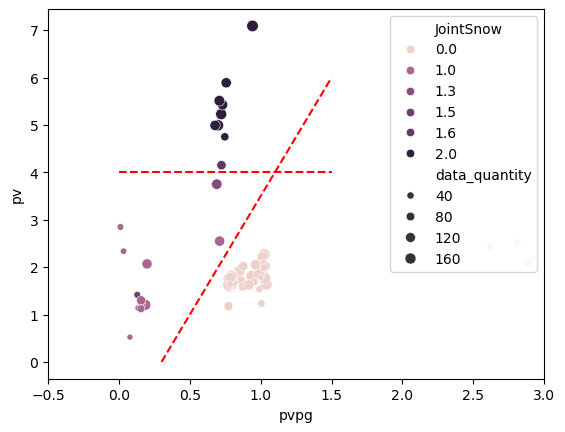

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow
26,delta_junction,28/07/2023,63.881325,-145.750888,1.005438,1.233698,1.227025,45.876712,0.309898,0.0,0.0,0.342466,27.0,1.027397,1.119543,1.119543,0.0
42,lacclair,13/07/2019,46.952325,-71.669270,15.377206,3.305810,0.214981,160.688312,0.308103,0.0,0.0,0.049784,1.0,0.129870,1.126542,1.268255,0.0
110,sodankyla_full,13/04/2019,67.362058,26.634739,0.077181,0.523591,6.783928,13.863636,7.188325,1.0,0.0,0.136364,3.0,1.000000,1.128684,1.156558,1.0
151,torgnon,25/11/2020,45.824025,7.561223,1.000397,1.784059,1.783351,16.034483,0.221027,0.0,0.0,0.034483,12.0,0.482759,1.130967,1.383217,0.0
9,delta_junction,06/05/2019,63.881325,-145.750888,0.772064,1.175192,1.522144,91.269430,0.073494,0.0,0.0,0.963731,2.0,0.948187,1.157932,1.154649,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,marcell_MN,26/01/2023,47.505125,-93.453767,0.677784,4.989714,7.361807,132.848444,311.245154,1.0,1.0,0.032476,21.0,0.129905,3.108705,3.388508,2.0
12,delta_junction,09/02/2021,63.881325,-145.750888,0.941894,7.088574,7.525871,181.000000,0.814929,1.0,1.0,0.000000,15.0,0.000000,3.192219,3.192219,2.0
24,delta_junction,27/10/2023,63.881325,-145.750888,0.746805,4.749041,6.359145,67.931034,116.054448,1.0,1.0,0.275862,30.0,1.103448,3.297343,3.297343,2.0
27,delta_junction,29/10/2022,63.881325,-145.750888,0.756249,5.889130,7.787284,132.740157,136.726100,1.0,1.0,0.000000,22.0,0.000000,3.528932,3.528932,2.0


In [6]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1)
    
    &((df_grouped['layer_flag'] <= .8)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] > 10)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

sns.scatterplot(data = data, x='pvpg', y='pv', hue='JointSnow', size='data_quantity')
plt.xlim(-.5,3)
# plt.ylim(0,3)
plt.plot([.3,1.5],[0,6],'r--')
plt.plot([0,1.5],[4,4],'r--')
plt.legend(loc='best')
plt.show()
len(data),len(data)/136
data.sort_values('pv_ratio_mean')

/tmp/ipykernel_861108/615448766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


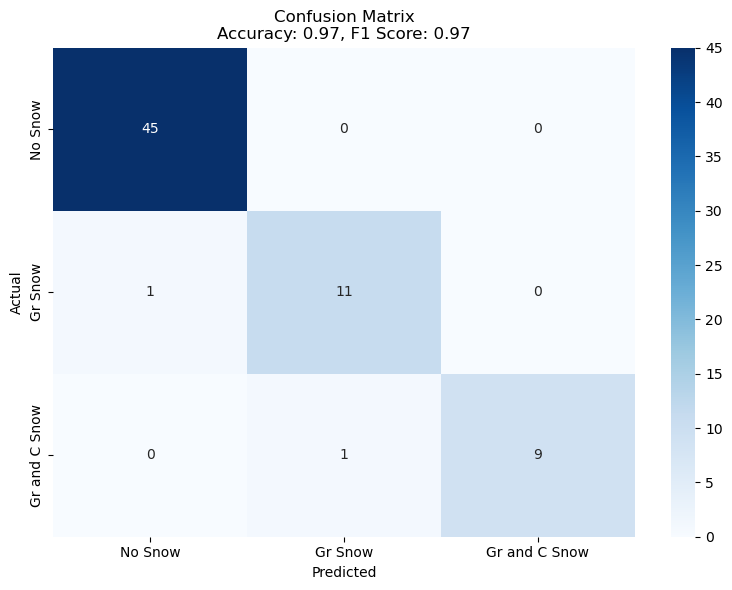

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,classification
7,delta_junction,05/11/2018,63.881325,-145.750888,0.129055,1.415936,10.971538,33.259259,1.762193,1.0,0.5,0.000000,0.0,0.000000,2.851105,2.851105,2.0,1
141,torgnon,20/02/2023,45.824025,7.561223,20.370104,6.317071,0.310115,37.857143,61.985141,1.0,0.0,0.085714,23.0,0.171429,1.402723,1.402723,1.0,0


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0))),
    axis=1
)

data.loc[:, 'JointSnow'] = round(data['JointSnow'])#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data['JointSnow'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['JointSnow'], data['classification'])
f1 = f1_score(data['JointSnow'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==0)&(data['FSC']>.95))|
    ((data['classification']==1)&((data['FSC']<.05)|(data['TreeSnow']>=0.5)))|
    ((data['classification']==2)&(data['TreeSnow']<.5))]

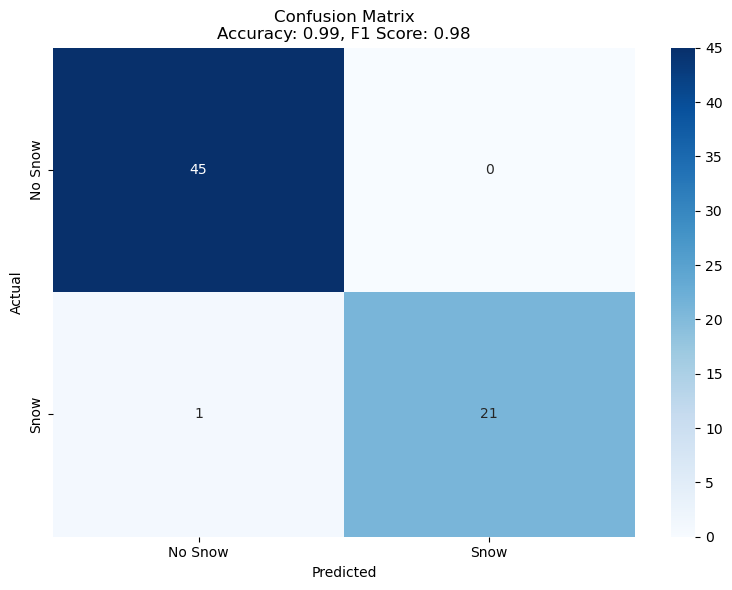

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,classification
141,torgnon,20/02/2023,45.824025,7.561223,20.370104,6.317071,0.310115,37.857143,61.985141,1.0,0.0,0.085714,23.0,0.171429,1.402723,1.402723,1.0,0


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (1 if row['pv'] > 4 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0))),
    axis=1
)

data.loc[:, 'FSC'] = round(data['FSC'])#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05))]

# Five Sites

In [7]:
from scripts.FSC_dataframe_phoreal import *

df=pd.read_pickle('five_sites_data.pkl')
loc_df = df[df['Confidence'] == 1].reset_index(drop=True)

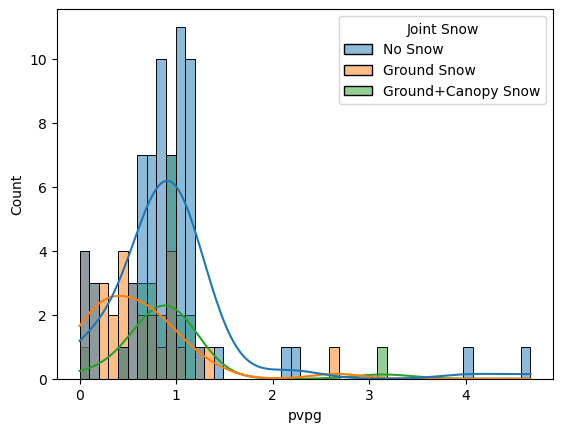

In [17]:
plt.figure()
plot = sns.histplot(loc_df[(loc_df['pvpg']<5)], x='pvpg', hue='Joint Snow', kde=True, palette='tab10', binwidth=.1)

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
legend = plot.legend_
# Set the new labels
new_labels = ['No Snow', 'Ground Snow', 'Ground+Canopy Snow']
for text, new_label in zip(legend.get_texts(), new_labels):
    text.set_text(new_label)

# plt.savefig('./images/five_sites/pvpg_10km.png')
plt.show()

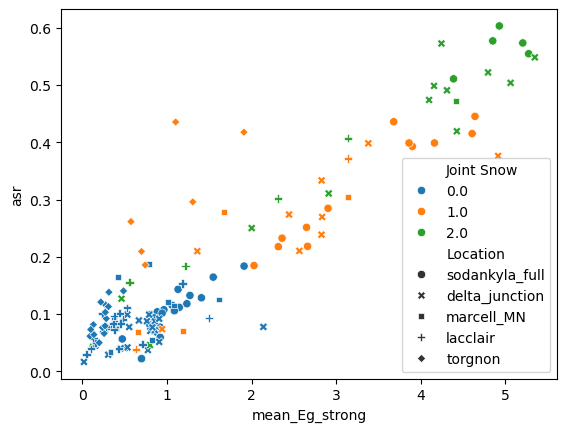

In [17]:
sns.scatterplot(loc_df, x='mean_Eg_strong', y = 'asr' ,hue='Joint Snow', palette='tab10', style='Location')
plt.legend(loc='lower right')
# plt.savefig('./images/five_sites/10km_asr_Eg.png')
plt.show()

# New scripts and functions

array(['15/11/2018'], dtype=object)

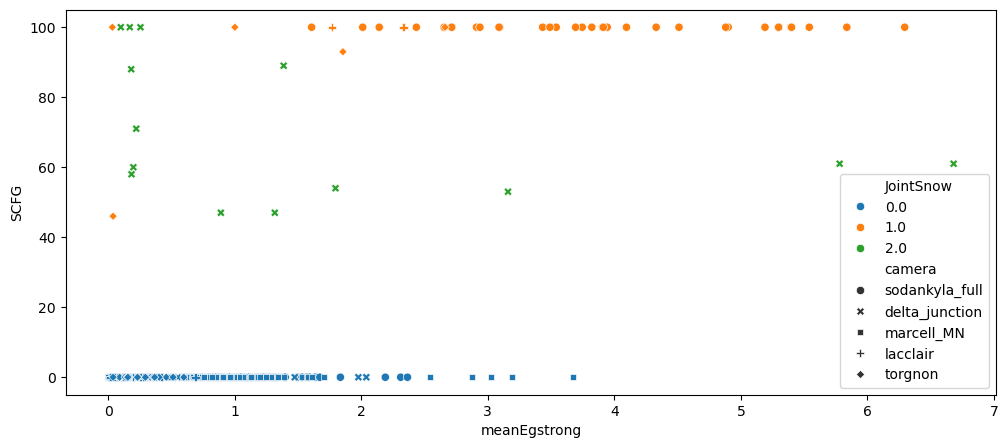

In [17]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFG' ,hue='JointSnow', palette='tab10', style='camera')

loc_df[(loc_df['camera']=='delta_junction')&(loc_df['SCFG'] <= 95)&(loc_df['SCFG'] >= 20)]['date'].unique()

,camera,date,pvpg,y_strong,y_weak,x_strong,x_weak,longitude,latitude,meanEgstrong,...,data_quantity,FSC,TreeSnow,JointSnow,Confidence,MxD10A1F,cc,MxD10A1,SCFG,SCFV
702,delta_junction,15/11/2018,-5.768161e-01,0.418348,NaN,7.252717e-01,NaN,-145.847939,63.8386,0.221779,...,4.0,1.0,1.0,2.0,1.0,77.0,NaN,77.0,71.0,43.0
703,delta_junction,15/11/2018,-1.457407e+00,1.043939,NaN,7.162991e-01,NaN,-145.847939,63.8436,0.198897,...,3.0,1.0,1.0,2.0,1.0,75.5,NaN,75.5,60.0,40.0
704,delta_junction,15/11/2018,-1.856489e+00,1.036329,NaN,5.582201e-01,NaN,-145.779794,63.8636,0.255298,...,5.0,1.0,1.0,2.0,1.0,82.0,39.251999,82.0,100.0,24.0
705,delta_junction,15/11/2018,-1.419103e+00,NaN,0.577842,NaN,4.071882e-01,-145.768436,63.8636,NaN,...,3.0,1.0,1.0,2.0,1.0,80.0,41.5854,80.0,100.0,23.0
706,delta_junction,15/11/2018,-8.407083e-02,0.610896,NaN,7.266445e+00,NaN,-145.779794,63.8686,0.170759,...,2.0,1.0,1.0,2.0,1.0,76.0,36.949902,76.0,100.0,24.0
707,delta_junction,15/11/2018,-2.502399e-17,0.671274,NaN,2.682524e+16,NaN,-145.768436,63.8686,0.099733,...,2.0,1.0,1.0,2.0,1.0,81.0,41.4743,81.0,100.0,23.0
708,delta_junction,15/11/2018,-2.280704e+00,1.153381,NaN,5.057129e-01,NaN,-145.711649,63.8686,0.184580,...,3.0,1.0,1.0,2.0,1.0,73.5,37.466301,73.5,58.0,48.0
709,delta_junction,15/11/2018,-8.493039e-02,0.397648,NaN,4.682047e+00,NaN,-145.768436,63.8736,0.182006,...,2.0,1.0,1.0,2.0,1.0,77.5,34.439999,77.5,88.0,24.0
710,delta_junction,15/11/2018,-9.254150e-01,2.340943,NaN,2.529614e+00,NaN,-145.711649,63.8736,1.386643,...,4.0,1.0,1.0,2.0,1.0,75.0,24.656,75.0,89.0,41.0
711,delta_junction,15/11/2018,-3.913045e-01,1.388838,NaN,3.549251e+00,NaN,-145.700291,63.8836,3.159575,...,2.0,1.0,1.0,2.0,1.0,79.0,31.012203,79.0,53.0,34.0


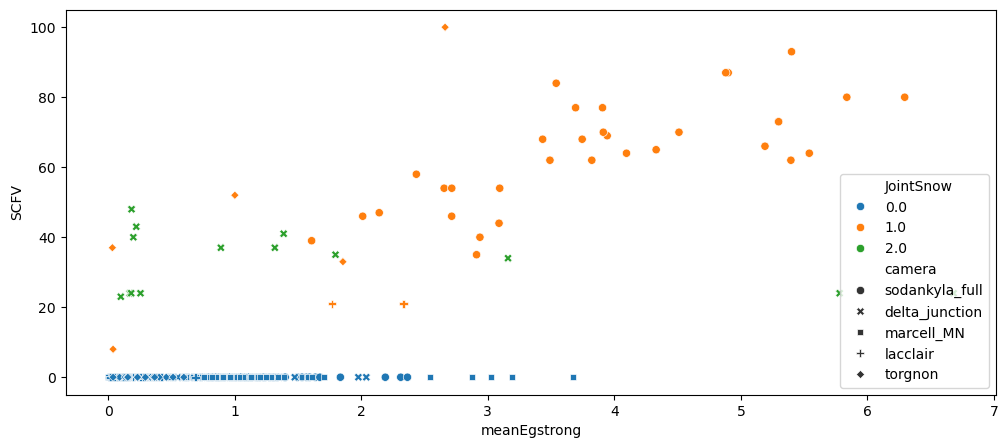

In [5]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFV' ,hue='JointSnow', palette='tab10', style='camera')

# loc_df[(loc_df['camera']=='marcell_MN')&(loc_df['SCFV'] <= 100)]['date'].unique()
loc_df[(loc_df['JointSnow']==2)&(loc_df['SCFV']<=100)]

No 26/3/2019


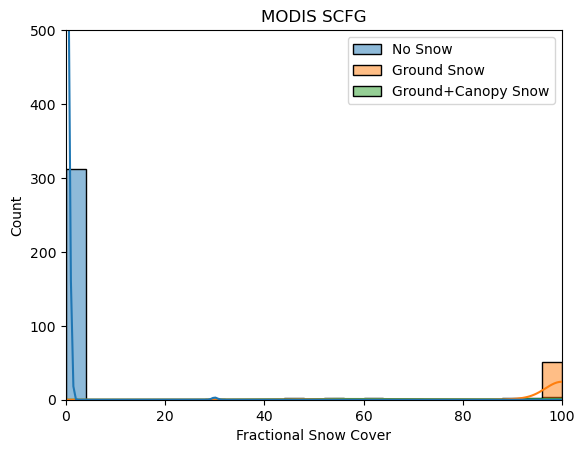

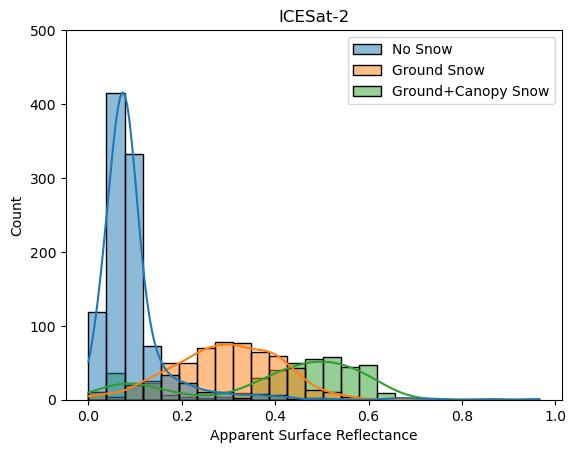

In [3]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1,2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    # Filter the dataframe
    
    if P == 1:
        print('No 26/3/2019')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)&(df['date'] != '26/03/2019')&(df['date'] != '24/12/2019')].reset_index(drop=True)

    # elif P == 2:
    #     print('No Marcell msw < 2.1')
    #     loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1)&(df['camera'] != 'marcell_MN')].reset_index(drop=True)
        
    
    hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    for i, ABC in enumerate(['SCFG', 'asr']):

        # if ABC == 'MxD10A1F':
        
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # else:
        #     Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)
        
        # Get the current legend and its handles
        legend = Plot.get_legend()
        handles = legend.legend_handles
        
        # print(labels)
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        plt.ylim(0,500)
        if ABC == 'SCFG':
            plt.xlim(0,100)
        
        # Extracting the KDE lines from the seaborn plot
        lines = Plot.get_lines()
        
        # Getting the x and y data for each KDE line
        kde_data = {}
        for line in lines:
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            kde_data[label] = (x_data, y_data)
    
        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        # plt.savefig(f'./images/hist_vector_{ABC}.svg')
        plt.show()
    
    # FI = hist_plot(loc_df, hue_labels, X='MxD10A1F', Hue='JointSnow', save=None, plot=True, xlim=(0,100), ylim=None, preset=False)#, save='/500mres/meanEvstrong_hist_msw2')
    # FI = hist_plot(loc_df, hue_labels, X='asr', Hue='JointSnow', save=None, plot=True, ylim=None, preset=False)
    # print(FI)

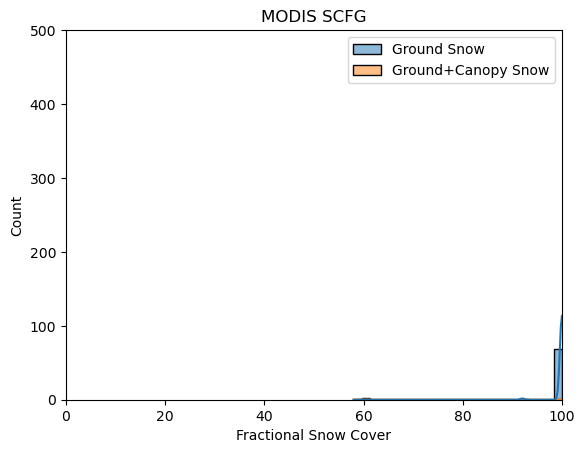

KS test for MODIS SCFG (JointSnow 1 vs 2):
Statistic: 0.7500, P-value: 1.0495e-02
The distributions are significantly different (p < 0.05).




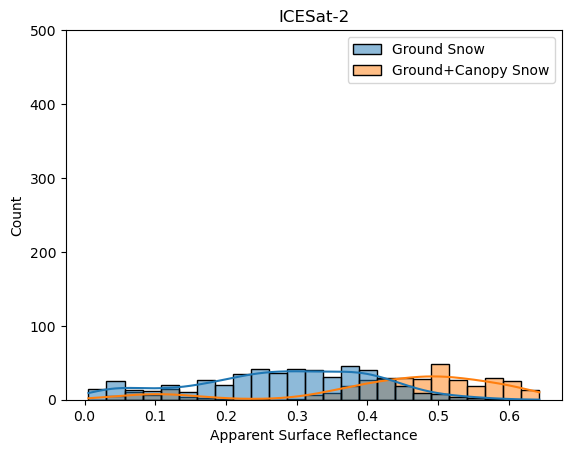

KS test for ICESat-2 (JointSnow 1 vs 2):
Statistic: 0.5658, P-value: 4.5028e-63
The distributions are significantly different (p < 0.05).




In [2]:
from scipy.stats import ks_2samp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1, 2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    
    if P == 1:
        # print('No 26/3/2019')
        loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1) &(df['JointSnow']!=0)].reset_index(drop=True)
    
    hue_labels = {'1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    
    for i, ABC in enumerate(['SCFG', 'asr']):
        # Plotting
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC, hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # Update legend labels
        legend = Plot.get_legend()
        handles = legend.legend_handles
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        
        plt.ylim(0, 500)
        if ABC == 'SCFG':
            plt.xlim(0, 100)

        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        plt.show()

        # Statistical comparison between JointSnow = 1 and JointSnow = 2
        data_js1 = loc_df[(loc_df['JointSnow'] == 1) & (loc_df[ABC] <= 100)][ABC].values
        data_js2 = loc_df[(loc_df['JointSnow'] == 2) & (loc_df[ABC] <= 100)][ABC].values
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, p_value = ks_2samp(data_js1, data_js2)
        print(f"KS test for {titles[i]} (JointSnow 1 vs 2):")
        print(f"Statistic: {ks_stat:.4f}, P-value: {p_value:.4e}")
        
        # Interpret the p-value
        if p_value < 0.05:
            print("The distributions are significantly different (p < 0.05).")
        else:
            print("No significant difference between the distributions (p ≥ 0.05).")
        print("\n")
